In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\df_copy.csv') # df_copy is a dataset export from my preprocesing sda

In [5]:
del(df['Unnamed: 0'])  

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
df_clust=df[['budget','popularity','revenue','runtime','vote_average','vote_count','release_quarter']]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
clust_trans_scaled=scaler.fit_transform(df_clust)

## PCA TRANSFORMATION

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA()

In [12]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_ratio_

array([0.44692769, 0.18390529, 0.13511176, 0.11189575, 0.06048544,
       0.03667937, 0.02499471])

### the curve below simply gives a boundary of the explained variance and the possible reduced columns
* 2 components explain about 60% of the data
* 4 components explain about 80% of the data

Text(0.5, 1.0, 'Explained Variance by components')

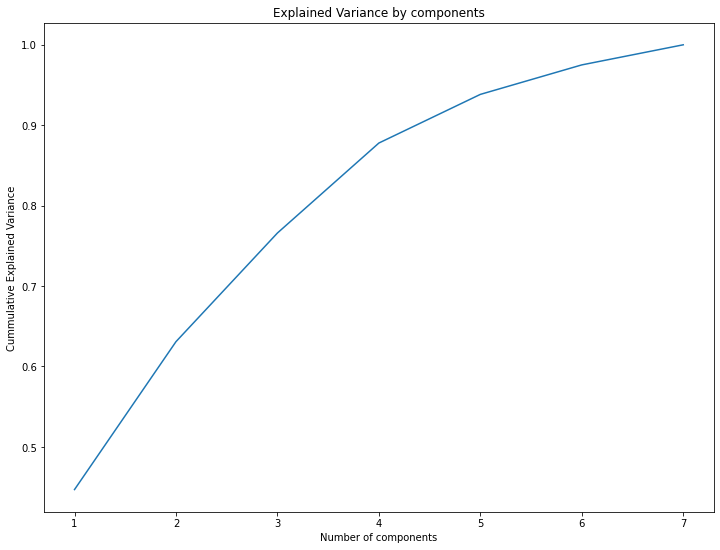

In [14]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance by components')

In [15]:
pca=PCA(n_components=3)

In [16]:
pca.fit(clust_trans_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[ 0.40961065,  0.45634327,  0.49482273,  0.24405028,  0.23567949,
         0.5120542 ,  0.04260917],
       [-0.33081311, -0.06829381, -0.20579693,  0.51113728,  0.62151705,
        -0.04198378,  0.44072538],
       [ 0.29520329, -0.12177854,  0.11031859, -0.01854138, -0.40814155,
        -0.10751738,  0.84105382]])

In [18]:
df_pca_comp=pd.DataFrame(pca.components_,columns=df_clust.columns,index=['component 1','component 2','component 3'])

In [19]:
df_pca_comp

,budget,popularity,revenue,runtime,vote_average,vote_count,release_quarter
component 1,0.409611,0.456343,0.494823,0.244050,0.235679,0.512054,0.042609
component 2,-0.330813,-0.068294,-0.205797,0.511137,0.621517,-0.041984,0.440725
component 3,0.295203,-0.121779,0.110319,-0.018541,-0.408142,-0.107517,0.841054


### THIS HEATMAP SHOWS THE CORRELATION BETWEEN THE PCA COMPONENTS AND ACTUAL COMPONENTS

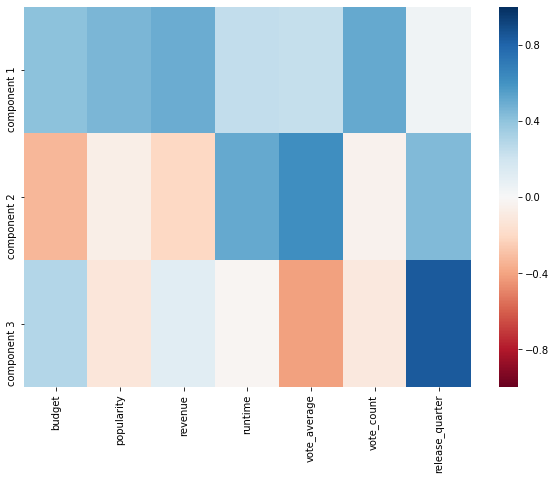

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pca_comp,vmin=-1,vmax=1,cmap='RdBu')

In [21]:
scores_pca=pca.transform(clust_trans_scaled)

## HIERACHIAL CLUSTERING

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage 

In [24]:
hier_clust = linkage(scores_pca, method='ward')

### the number of clusters will be the number of vertical lines intersected by the threshold(distance selected)
* distance of 80 would mean 2 clusters
* distance of 50 would mean 4 clusters
* etc

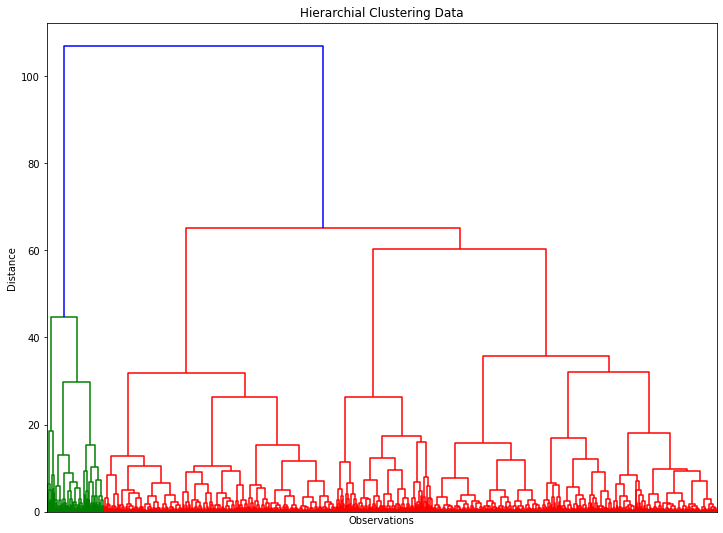

In [25]:
plt.figure(figsize=(12,9))
plt.title('Hierarchial Clustering Data')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level')
plt.show()

In [26]:
from sklearn.cluster import KMeans 

### ELBOW METHOD FOR CHOOSING OPTIMAL CLUSTERS

In [27]:
wcss =[]
for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
        kmeans.fit(scores_pca)
        wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

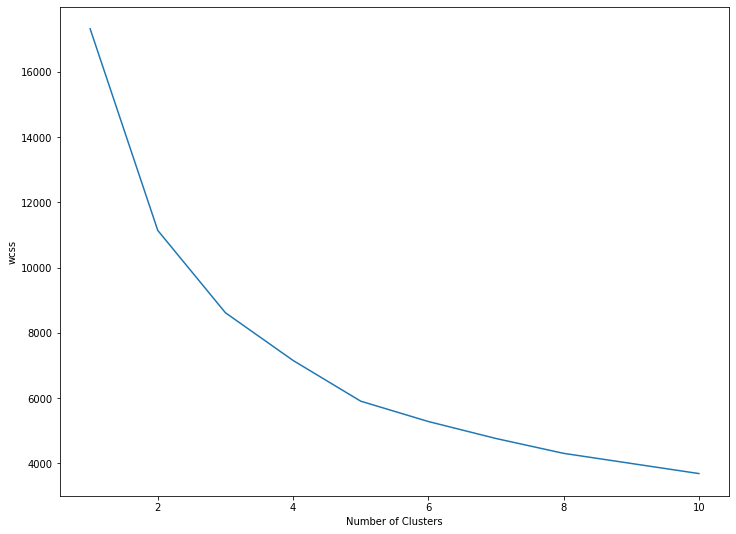

In [28]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

## KMEANS CLUSTERING

In [29]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=101)

In [30]:
kmeans.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [47]:
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment KMeans pca']=kmeans.labels_

### THE DATAFRAME BELOW SHOWS THE ORIGINAL COMPONENTS WITH THE PCA COMPONENTS SIDE BY SIDE

In [49]:
df_segm_pca_kmeans.sample(2)

,cast,crew,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3,Segment KMeans pca
811,"['Brady Corbet', 'Soren Fulton', 'Debora Weston']",['Jonathan Frakes'],57000000,"['Action', 'Adventure', 'Comedy', 'Family', 'F...","['secret organization', 'based on tv series', ...",en,Thunderbirds,9.278750,"['Studio Canal', 'Working Title Films', 'Tracy...","['United Kingdom', 'France']",28283637,95.0,Released,4.2,91,2004,7,3,-1.404019,-1.690814,1.470178,3
3002,"['Robert Fontaine', 'Michael Brainard']",['Robert Fontaine'],2100000,"['Drama', 'Crime']","['new york state', 'hate crime']",en,Mi America,0.039007,['Industrial House Films'],['United States of America'],3330,126.0,Released,0.0,0,2015,10,4,-2.868135,-3.057255,3.833055,3


In [50]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment KMeans pca']).mean()

In [51]:
df_segm_pca_kmeans_freq

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3
Segment KMeans pca,,,,,,,,,,,,
0,2.965359e+07,28.985540,9.366503e+07,125.344645,6.975292,946.989396,1997.522800,9.171792,3.335101,0.190957,1.227739,0.131154
1,2.813006e+07,22.473416,7.028106e+07,104.009775,6.246432,631.302053,2002.043011,3.309873,1.429130,-0.601266,-0.523349,-0.959427
2,1.325068e+08,93.598004,5.659417e+08,124.166667,6.819792,4271.954861,2007.843750,6.961806,2.607639,4.329903,-0.715002,0.136351
3,3.730345e+07,16.892191,7.002938e+07,99.658462,5.580513,396.415385,2003.500513,8.737436,3.224615,-0.832810,-0.427129,0.839535


### CONNOTATIONS
* P.I MEANS PREDOMINANTLY INDEPENDENT
* P.B MEANS PREDOMINANTLY BIG STUDIOS

In [53]:
df_segm_pca_kmeans_freq['N Obv']=df_segm_pca_kmeans[['Segment KMeans pca','budget']].groupby(['Segment KMeans pca']).count()
df_segm_pca_kmeans_freq['Prp_osv']=df_segm_pca_kmeans_freq['N Obv']/df_segm_pca_kmeans_freq['N Obv'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'P.B',1:'P.I',2:'Big Studios',3:'Independents'})

In [54]:
df_segm_pca_kmeans_freq

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_quarter,Component 1,Component 2,Component 3,N Obv,Prp_osv
Segment KMeans pca,,,,,,,,,,,,,,
P.B,2.965359e+07,28.985540,9.366503e+07,125.344645,6.975292,946.989396,1997.522800,9.171792,3.335101,0.190957,1.227739,0.131154,943,0.292041
P.I,2.813006e+07,22.473416,7.028106e+07,104.009775,6.246432,631.302053,2002.043011,3.309873,1.429130,-0.601266,-0.523349,-0.959427,1023,0.316816
Big Studios,1.325068e+08,93.598004,5.659417e+08,124.166667,6.819792,4271.954861,2007.843750,6.961806,2.607639,4.329903,-0.715002,0.136351,288,0.089192
Independents,3.730345e+07,16.892191,7.002938e+07,99.658462,5.580513,396.415385,2003.500513,8.737436,3.224615,-0.832810,-0.427129,0.839535,975,0.301951


In [55]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment KMeans pca'].map({0:'P.B',1:'P.I',2:'Big Studios',3:'Independents'})

### CLUSTER VISUALS
####  TO UNDERSTAND WHAT THE COMPONENTS DEPICT PLEASE REFER TO HEATMAP

* NOTICE THE NATURAL DIVIDE BETWEEN THE BIG STUDIOS AND INDEPENDENT 

* NOTICE THE P.I SHIFT TOWARDS THE SIDE OF THE INDEPENDENT IN THE CLUSTER ARRANGEMENT(VISUAL 1)


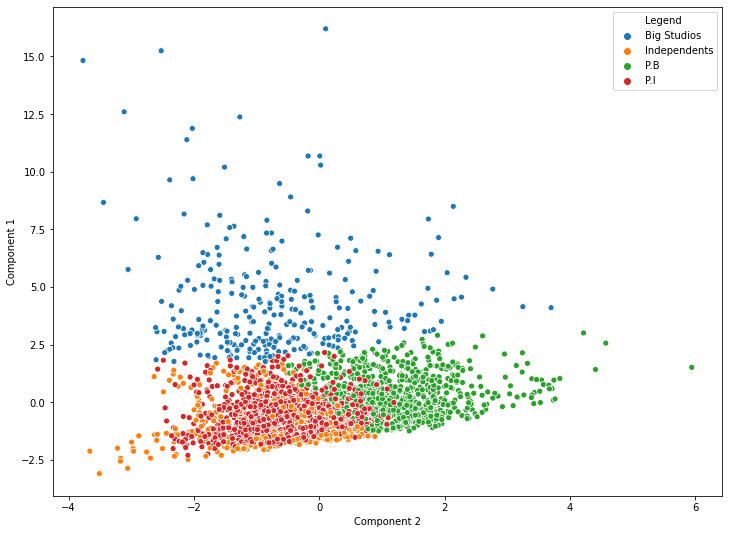

In [56]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['Component 2'],df_segm_pca_kmeans['Component 1'],hue=df_segm_pca_kmeans['Legend'])

### NOTICE SAME DIVIDE IN THE SECOND VISUAL
* THE P.B FALLS IN AN ELEVATED POSITION TO THE P.I AND THE INDEPENDENTS SIGNALING THE DIFFERENCE

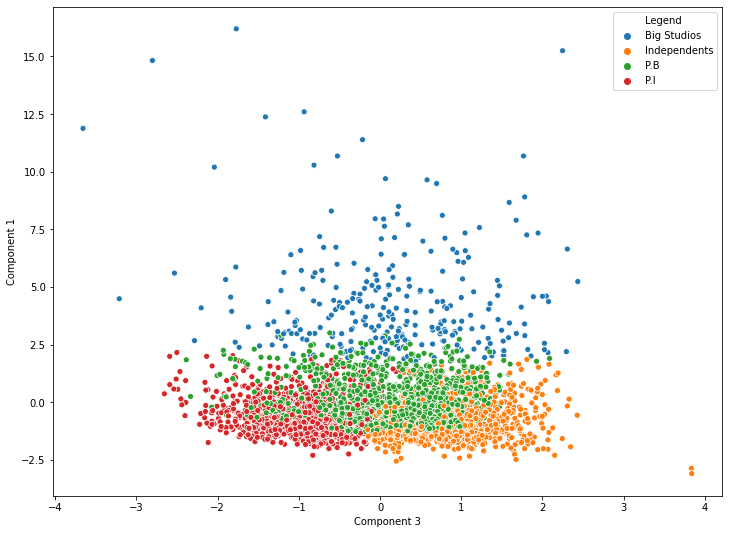

In [57]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['Component 3'],df_segm_pca_kmeans['Component 1'],hue=df_segm_pca_kmeans['Legend'])

### ANOTHER DIVIDE BETWEEN THE BIG STUDIOS(P.B) AND INDEPENDENTS
* COMPONENT 3 AND 2 ARE SITUATED AROUND RELEASE QUARTER AND VOTE AVERAGE.

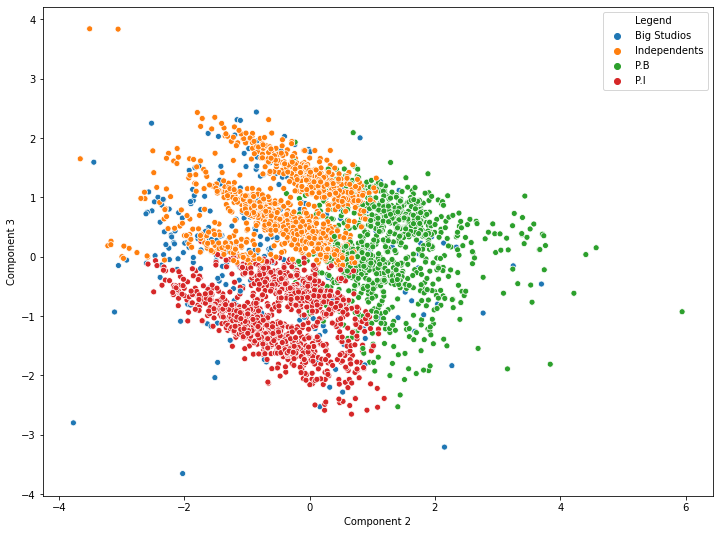

In [59]:
plt.figure(figsize=(12,9))
sns.scatterplot(df_segm_pca_kmeans['Component 2'],df_segm_pca_kmeans['Component 3'],hue=df_segm_pca_kmeans['Legend'])